In [16]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from collections import OrderedDict
import re
import xlsxwriter 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('baseball_ex1.csv')
df.tail()


,Unnamed: 0,Year,Team,P,PA,N_of_ball,P/PA,LookingStrike,SwingStrike,FoulStrike,...,Minus,WPA.1,PLI,WPA/LI,Clutch,ph,PoilOut,PoilMissing,PoilOut%,salary
117,윤요섭,2016,kt,C,149,555,3.73,29.6,15.6,24.3,...,-2.96,0.17,1.09,0.20,-0.05,33,0,0,0.00,5600
118,유민상,2016,kt,1B,254,1061,4.18,30.1,12.6,29.4,...,-4.06,0.44,0.99,0.66,-0.21,22,0,0,6.35,4500
119,전민수,2016,kt,RF,240,939,3.91,28.8,13.5,28.8,...,-3.64,0.80,0.93,0.77,0.08,17,2,0,3.45,5000
120,오정복,2016,kt,LF,344,1333,3.88,32.3,8.4,26.1,...,-5.50,0.23,1.05,0.36,-0.14,15,0,0,8.89,7000
121,이대형,2016,kt,CF,654,2414,3.69,17.8,12.2,37.3,...,-10.47,0.25,0.97,0.02,0.23,3,0,0,1.16,30000


In [7]:
df1 = df.ix[:,4:] #Feature 비교를 위해 이름, 연도, Team, Position 제거
df1.tail()

,PA,N_of_ball,P/PA,LookingStrike,SwingStrike,FoulStrike,hit/strike,S,B,BatSwing_percent,...,Minus,WPA.1,PLI,WPA/LI,Clutch,ph,PoilOut,PoilMissing,PoilOut%,salary
117,149,555,3.73,29.6,15.6,24.3,30.5,60.2,39.8,42.3,...,-2.96,0.17,1.09,0.20,-0.05,33,0,0,0.00,5600
118,254,1061,4.18,30.1,12.6,29.4,27.9,61.2,38.8,42.8,...,-4.06,0.44,0.99,0.66,-0.21,22,0,0,6.35,4500
119,240,939,3.91,28.8,13.5,28.8,28.9,62.9,37.1,44.8,...,-3.64,0.80,0.93,0.77,0.08,17,2,0,3.45,5000
120,344,1333,3.88,32.3,8.4,26.1,33.1,64.3,35.7,43.5,...,-5.50,0.23,1.05,0.36,-0.14,15,0,0,8.89,7000
121,654,2414,3.69,17.8,12.2,37.3,32.7,65.7,34.3,54.0,...,-10.47,0.25,0.97,0.02,0.23,3,0,0,1.16,30000


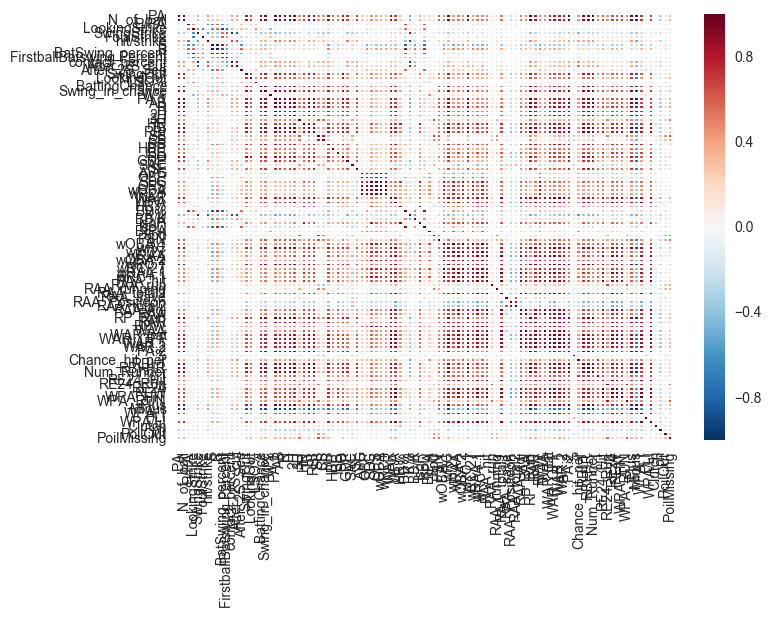

In [8]:
corr_data = pd.DataFrame.corr(df1.ix[:,:-2])
sns.heatmap(corr_data, annot=False, linewidths=1)
plt.show()

### Feature 값이 너무 많아 도메인 지식을 활용해서 연봉에 영향을 미칠 수 있는 것들로 골라서 줄여주었음(109 → 39)

In [2]:
df1 = pd.read_csv('baseball_preprocessing2.csv')
df1.tail()

,name,Year,Team,P,P/PA,BatSwing_percent,contact_percent,BattingchanceSwing%,PA,AB,...,RP_Run,RAR,WAA,Chance_hit_per,RE24,WPA.1,PoilOut,PoilMissing,PoilOut%,salary
117,윤요섭,2016,kt,C,3.73,42.3,77.9,5.4,149,126,...,8.5,4.4,-0.4,0.205,-1.19,0.17,0,0,0.00,5600
118,유민상,2016,kt,1B,4.18,42.8,81.9,8.7,254,213,...,14.5,5.2,-0.8,0.312,4.66,0.44,0,0,6.35,4500
119,전민수,2016,kt,RF,3.91,44.8,81.0,10.0,240,213,...,13.7,13.9,0.0,0.362,12.96,0.80,2,0,3.45,5000
120,오정복,2016,kt,LF,3.88,43.5,87.6,7.5,344,306,...,19.6,5.8,-1.2,0.313,-2.71,0.23,0,0,8.89,7000
121,이대형,2016,kt,CF,3.69,54.0,85.1,10.0,654,600,...,37.3,13.5,-2.1,0.315,-7.55,0.25,0,0,1.16,30000


In [3]:
df2 = df1.ix[:,4:]
df2.tail()

,P/PA,BatSwing_percent,contact_percent,BattingchanceSwing%,PA,AB,R,TB,RBI,AVG,...,RP_Run,RAR,WAA,Chance_hit_per,RE24,WPA.1,PoilOut,PoilMissing,PoilOut%,salary
117,3.73,42.3,77.9,5.4,149,126,14,54,16,0.238,...,8.5,4.4,-0.4,0.205,-1.19,0.17,0,0,0.00,5600
118,4.18,42.8,81.9,8.7,254,213,30,86,37,0.282,...,14.5,5.2,-0.8,0.312,4.66,0.44,0,0,6.35,4500
119,3.91,44.8,81.0,10.0,240,213,31,90,29,0.305,...,13.7,13.9,0.0,0.362,12.96,0.80,2,0,3.45,5000
120,3.88,43.5,87.6,7.5,344,306,45,123,36,0.304,...,19.6,5.8,-1.2,0.313,-2.71,0.23,0,0,8.89,7000
121,3.69,54.0,85.1,10.0,654,600,89,215,42,0.320,...,37.3,13.5,-2.1,0.315,-7.55,0.25,0,0,1.16,30000


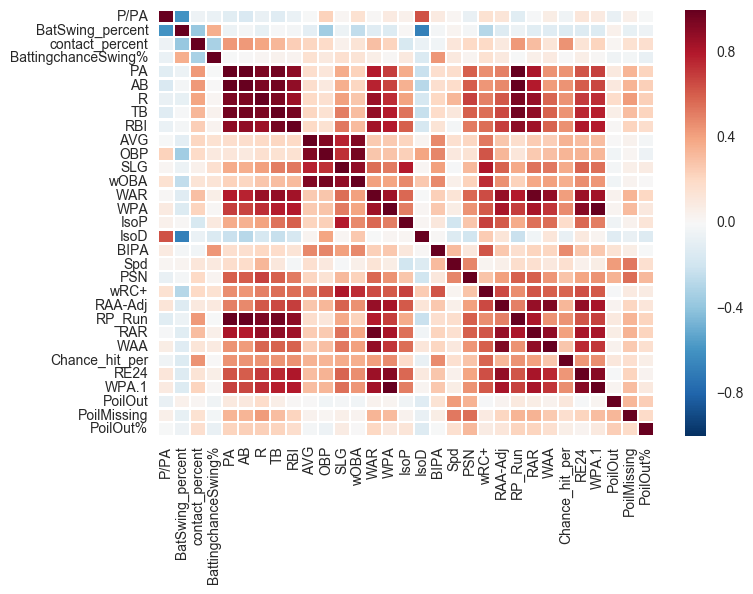

In [16]:
corr_data = pd.DataFrame.corr(df2.ix[:,:-1])
sns.heatmap(corr_data, annot=False, linewidths=1)
plt.show()

In [4]:
model_sm = sm.OLS(df2.ix[:,-1], df2.ix[:,:-1])
result_sm = model_sm.fit()
print(result_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     14.90
Date:                Thu, 06 Apr 2017   Prob (F-statistic):           5.40e-24
Time:                        18:44:08   Log-Likelihood:                -1364.6
No. Observations:                 122   AIC:                             2791.
Df Residuals:                      91   BIC:                             2878.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
P/PA                -6904.6151   1

p-value 값들이 너무 높아서 의미가 없음

#### 다중공선성을 줄여주기 위해 
1. 도메인 지식을 활용하여 피쳐들(x값들을) 그룹화를 시켜 줄여줌
2. PCA를 통해 줄여줌

#### 먼저 피쳐 값들의 범위가 다르기 때문에 스케일링 실시

In [20]:
from sklearn.preprocessing import normalize

In [11]:
dfY = pd.DataFrame(df2, columns=['salary'])
dfX = df2.ix[:,:-1]

In [17]:
normalize_list = list(dfX.columns)

result = []
for item in normalize_list:
    result.append(normalize(dfX[item]).T)
    
df_Hitter = pd.DataFrame(np.hstack(result), columns=normalize_list)

c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\python27\lib\site-packages\skle

In [18]:
group1 = (df_Hitter['P/PA']+ df_Hitter['BatSwing_percent']+ df_Hitter['contact_percent'] + df_Hitter['BattingchanceSwing%']/4)
group2 = (df_Hitter['PA']+df_Hitter['AB']+df_Hitter['R']+df_Hitter['TB']+df_Hitter['RBI']+ df_Hitter['AVG']+ df_Hitter['OBP']+ df_Hitter['SLG']+ df_Hitter['wOBA']+ df_Hitter['WAR']+ df_Hitter['WPA'])/11
group3 = (df_Hitter['IsoP']+ df_Hitter['IsoD']+ df_Hitter['BIPA']+ df_Hitter['Spd']+ df_Hitter['PSN']+ df_Hitter['wRC+'])/6 
group4 = (df_Hitter['RAA-Adj']+ df_Hitter['RP_Run']+ df_Hitter['RAR']+ df_Hitter['WAA'])/4 
group5 = (df_Hitter['Chance_hit_per']+ df_Hitter['RE24']+ df_Hitter['WPA'])/3 
group6 = (df_Hitter['PoilOut']+ df_Hitter['PoilMissing']+ df_Hitter['PoilOut%'])/3

In [23]:
df_Hitter_Revise = pd.concat([group1, group2, group3, group4, group5, group6, dfY],axis=1)
df_Hitter_Revise.columns = ['Basic','Extend','Value','Clutch','Run', 'Miss', 'Salary']

In [24]:
df_Hitter_Revise.tail()

,Basic,Extend,Value,Clutch,Run,Miss,Salary
117,0.272522,0.044614,0.070481,-0.001438,0.021255,0.000000,5600
118,0.296676,0.058033,0.068528,-0.001423,0.043530,0.051005,4500
119,0.296629,0.059866,0.077535,0.027706,0.064654,0.123937,5000
120,0.294640,0.065334,0.063259,-0.010799,0.030846,0.071407,7000
121,0.314535,0.093599,0.065783,-0.021543,0.024875,0.009318,30000


In [52]:
regression1 = 'Salary ~ np.log(Basic) + Extend + Value + Clutch + Run + Miss ' 
weight_model = sm.OLS.from_formula(regression1, data=df_Hitter_Revise)
result1 = weight_model.fit()
print result1.summary()

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     62.25
Date:                Thu, 06 Apr 2017   Prob (F-statistic):           3.35e-24
Time:                        19:17:27   Log-Likelihood:                -1380.3
No. Observations:                 122   AIC:                             2769.
Df Residuals:                     118   BIC:                             2780.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.735e+04   9285.395      1.869      0.0

### Anova 분석

In [51]:
formula_str = """Salary ~ Basic + Extend + Value + Clutch + Run + Miss"""


model = sm.OLS.from_formula(formula_str, data=df_Hitter_Revise)
result = model.fit()
table_anova = sm.stats.anova_lm(result)
table_anova

,df,sum_sq,mean_sq,F,PR(>F)
Basic,1.0,2.002158e+07,2.002158e+07,0.051789,8.203826e-01
Extend,1.0,6.734829e+10,6.734829e+10,174.208097,8.888445e-25
Value,1.0,6.617592e+09,6.617592e+09,17.117556,6.716902e-05
Clutch,1.0,3.834780e+09,3.834780e+09,9.919327,2.084442e-03
Run,1.0,1.168556e+09,1.168556e+09,3.022673,8.478434e-02
Miss,1.0,4.916621e+08,4.916621e+08,1.271770,2.617823e-01
Residual,115.0,4.445863e+10,3.865968e+08,NaN,NaN
